<a href="https://colab.research.google.com/github/supriyameduri9/CMPE255_Assignments/blob/main/GBM_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Necessary Dependencies

In [23]:
pip install catboost

     |████████████████████████████████| 76.3 MB 60 kB/s 


In [102]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')

from sklearn.preprocessing import OneHotEncoder,LabelEncoder, label_binarize
import catboost
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive._mount('/content/drive')

Mounted at /content/drive


Used [Titanic dataset](https://www.kaggle.com/c/titanic/data) from kaggle

In [3]:
train= pd.read_csv('/content/drive/MyDrive/train.csv')
test=pd.read_csv('/content/drive/MyDrive/test.csv')
gender_submission=pd.read_csv('/content/drive/MyDrive/gender_submission.csv') # example of what a submission should look like

In [4]:
train.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [6]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Created a new dataframe to select the necessary features

In [8]:
df = pd.DataFrame()

In [9]:
df['Survived'] = train['Survived']
df['Pclass']= train['Pclass']
df['Sex']=LabelEncoder().fit_transform(train['Sex'])
df['SibSp'] = train['SibSp']
df['Parch']= train['Parch']
df['Fare']= train['Fare']
df['Embarked'] = train['Embarked']

In [10]:
df

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,1,1,0,7.2500,S
1,1,1,0,1,0,71.2833,C
2,1,3,0,0,0,7.9250,S
3,1,1,0,1,0,53.1000,S
4,0,3,1,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,0,2,1,0,0,13.0000,S
887,1,1,0,0,0,30.0000,S
888,0,3,0,1,2,23.4500,S
889,1,1,1,0,0,30.0000,C


In [12]:
df = df.dropna(subset=['Embarked'])
df

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,1,1,0,7.2500,S
1,1,1,0,1,0,71.2833,C
2,1,3,0,0,0,7.9250,S
3,1,1,0,1,0,53.1000,S
4,0,3,1,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,0,2,1,0,0,13.0000,S
887,1,1,0,0,0,30.0000,S
888,0,3,0,1,2,23.4500,S
889,1,1,1,0,0,30.0000,C


Feature Encoding

In [103]:
df_embarked = pd.get_dummies(df['Embarked'], 
                                     prefix='embarked')

df_sex = pd.get_dummies(df['Sex'], 
                                prefix='sex')

df_plcass = pd.get_dummies(df['Pclass'], 
                                   prefix='pclass')

In [104]:
# Combine the one hot encoded columns with df_con_enc
df_new = pd.concat([df, 
                    df_embarked, 
                    df_sex, 
                    df_plcass], axis=1)

# Drop the original categorical columns (because now they've been one hot encoded)
df_new = df_new.drop(['Pclass', 'Sex', 'Embarked'], axis=1)

In [105]:
# Split the dataframe into data and labels
X_train = df_new.drop('Survived', axis=1) # data
y_train = df_new.Survived # labels

In [106]:
print(X_train.shape)
print(y_train.shape)

(889, 11)
(889,)


## GB Classification Techniques

Decision Tree Classifier

In [107]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=1234)
model = dtc.fit(X_train, y_train)
accuracy_decision = round(model.score(X_train, y_train) * 100, 2)
print("Accuracy of Decision Tree Classifier: ", accuracy_decision)

Accuracy of Decision Tree Classifier:  92.46


Adaboost Classifier

In [108]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators=100, random_state=0)
model = abc.fit(X_train, y_train)
accuracy_adaboost = round(model.score(X_train, y_train) * 100, 2)
print("Accuracy of Adaboost  Classifier: ", accuracy_adaboost)

Accuracy of Adaboost  Classifier:  80.54


Random Forest Classifier

In [109]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10, min_samples_split=2)
model = rfc.fit(X_train, y_train)
accuracy_random = round(model.score(X_train, y_train) * 100, 2)
print("Accuracy of Random Forest Classifier: ", accuracy_random)

Accuracy of Random Forest Classifier:  91.23


XGB Classifier

In [110]:
import xgboost as xgb
xgb_cls = xgb.XGBClassifier(tree_method='hist')
model = xgb_cls.fit(X_train, y_train)
accuracy_xgb = round(model.score(X_train, y_train) * 100, 2)
print("Accuracy of XGB Classifier: ", accuracy_xgb)

Accuracy of XGB Classifier:  84.81


LightGBM Classifier

In [111]:
import lightgbm as lgb
lgb_cls = lgb.LGBMClassifier(boosting_type='goss')
model = lgb_cls.fit(X_train, y_train)
accuracy_lgb = round(model.score(X_train, y_train) * 100, 2)
print("Accuracy of Light GBM Classifier: ", accuracy_lgb)

Accuracy of Light GBM Classifier:  86.5


Catboost Classifier

In [112]:
from catboost import CatBoostClassifier 
catboost_model = CatBoostClassifier(iterations=1000,
                                    custom_loss=['Accuracy'],
                                    loss_function='Logloss')

# Fit CatBoost model
catboost_model.fit(X_train, y_train,
                   plot=True)

# CatBoost accuracy
accuracy_catboost = round(catboost_model.score(X_train, y_train) * 100, 2)

print("Accuracy of Catboost Classifier: ", accuracy_catboost)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.009797
0:	learn: 0.6869023	total: 1.44ms	remaining: 1.43s
1:	learn: 0.6809477	total: 6.1ms	remaining: 3.04s
2:	learn: 0.6751064	total: 8.61ms	remaining: 2.86s
3:	learn: 0.6702940	total: 9.32ms	remaining: 2.32s
4:	learn: 0.6643499	total: 10.6ms	remaining: 2.12s
5:	learn: 0.6588257	total: 11.9ms	remaining: 1.97s
6:	learn: 0.6533862	total: 13.1ms	remaining: 1.86s
7:	learn: 0.6482843	total: 14.5ms	remaining: 1.79s
8:	learn: 0.6432105	total: 16ms	remaining: 1.76s
9:	learn: 0.6384117	total: 17.3ms	remaining: 1.71s
10:	learn: 0.6337290	total: 18.5ms	remaining: 1.67s
11:	learn: 0.6293405	total: 19.9ms	remaining: 1.63s
12:	learn: 0.6247989	total: 21.1ms	remaining: 1.6s
13:	learn: 0.6206112	total: 22.3ms	remaining: 1.57s
14:	learn: 0.6161288	total: 23.5ms	remaining: 1.54s
15:	learn: 0.6119685	total: 24.8ms	remaining: 1.52s
16:	learn: 0.6077480	total: 26ms	remaining: 1.5s
17:	learn: 0.6038244	total: 26.9ms	remaining: 1.47s
18:	learn: 0.5996791	total: 28.1ms	remaining: 1.45s

## 

In [113]:
classifier_name = ["DecisionTree Classifier","Adaboost Classifier", "Random Forest Classifier", "XGB Classifier", "LightGBM Classifier", "Catboost Classifier"]
accuracies = [accuracy_decision, accuracy_adaboost, accuracy_random, accuracy_xgb, accuracy_lgb, accuracy_catboost]

[Text(0, 0, 'DecisionTree Classifier'),
 Text(0, 0, 'Adaboost Classifier'),
 Text(0, 0, 'Random Forest Classifier'),
 Text(0, 0, 'XGB Classifier'),
 Text(0, 0, 'LightGBM Classifier'),
 Text(0, 0, 'Catboost Classifier')]

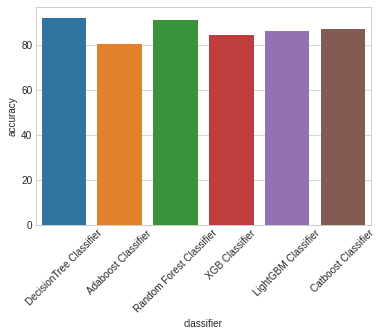

In [114]:
bar_plot = sns.barplot(x='classifier', y='accuracy', data=pd.DataFrame({"classifier": classifier_name, "accuracy": accuracies}))
bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=45)

## GB Regression Techniques

XGB Regressor

In [84]:
from sklearn import datasets

db = datasets.load_iris()

In [85]:
X = db.data
y = db.target
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)

In [87]:
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score, KFold
xgbr = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8) 
print(xgbr)

# XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
#        colsample_bynode=1, colsample_bytree=1, gamma=0,
#        importance_type='gain', learning_rate=0.1, max_delta_step=0,
#        max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
#        n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
#        reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
#        silent=None, subsample=1, verbosity=1)



XGBRegressor(colsample_bytree=0.8, eta=0.1, max_depth=7, n_estimators=1000,
             subsample=0.7)


In [88]:
xgbr.fit(X_train, Y_train)
score = xgbr.score(X_train, Y_train)  
print("Training score: ", score)
scores = cross_val_score(xgbr, X_train, Y_train,cv=10)
print("Mean cross-validation score: %.2f" % scores.mean())

[23:49:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Training score:  0.9999994575795195
[23:49:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:49:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:49:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:49:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:49:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:49:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:49:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:lin

In [90]:
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(xgbr, X_train, Y_train
                               , cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())



[23:49:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:49:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:49:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:49:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:49:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:49:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:49:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:49:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [92]:
from sklearn.metrics import mean_squared_error
y_pred = xgbr.predict(X_test)
mse = mean_squared_error(Y_test, y_pred)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % (mse**(1/2.0)))

MSE: 0.07
RMSE: 0.27


Catboost Regressor

In [93]:
from catboost import CatBoostRegressor

cb_reg = CatBoostRegressor(iterations=100,
                             learning_rate=0.02,
                             depth=12,
                             eval_metric='RMSE',
                             random_seed = 23,
                             bagging_temperature = 0.2,
                             od_type='Iter',
                             metric_period = 75,
                             od_wait=100)

In [97]:
cb_reg.fit(X_train, Y_train,
             eval_set=(X_test, Y_test),
             use_best_model=True,
             verbose=True)

0:	learn: 0.7940265	test: 0.8512985	best: 0.8512985 (0)	total: 657us	remaining: 65.1ms
75:	learn: 0.2978316	test: 0.3930366	best: 0.3930366 (75)	total: 220ms	remaining: 69.5ms
99:	learn: 0.2287841	test: 0.3335302	best: 0.3335302 (99)	total: 288ms	remaining: 0us

bestTest = 0.3335302292
bestIteration = 99



In [98]:
y_pred = cb_reg.predict(X_test)
mse = mean_squared_error(Y_test, y_pred)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % (mse**(1/2.0)))

MSE: 0.11
RMSE: 0.33


Light GBM Regressor

In [100]:
from lightgbm import LGBMRegressor
lg_reg = LGBMRegressor(objective ="regression", num_leaves = 35, random_state= 1)
lg_reg.fit(X_train, Y_train,
             eval_set=(X_test, Y_test),
             verbose=True)

[1]	valid_0's l2: 0.617544
[2]	valid_0's l2: 0.516292
[3]	valid_0's l2: 0.433844
[4]	valid_0's l2: 0.367691
[5]	valid_0's l2: 0.31339
[6]	valid_0's l2: 0.271401
[7]	valid_0's l2: 0.235709
[8]	valid_0's l2: 0.201295
[9]	valid_0's l2: 0.177935
[10]	valid_0's l2: 0.154733
[11]	valid_0's l2: 0.136018
[12]	valid_0's l2: 0.123675
[13]	valid_0's l2: 0.110608
[14]	valid_0's l2: 0.0986731
[15]	valid_0's l2: 0.0925788
[16]	valid_0's l2: 0.0841256
[17]	valid_0's l2: 0.0792845
[18]	valid_0's l2: 0.0741721
[19]	valid_0's l2: 0.0709667
[20]	valid_0's l2: 0.067447
[21]	valid_0's l2: 0.0653181
[22]	valid_0's l2: 0.0628596
[23]	valid_0's l2: 0.0608236
[24]	valid_0's l2: 0.0602046
[25]	valid_0's l2: 0.0596972
[26]	valid_0's l2: 0.0577109
[27]	valid_0's l2: 0.0572122
[28]	valid_0's l2: 0.0557286
[29]	valid_0's l2: 0.054474
[30]	valid_0's l2: 0.0545985
[31]	valid_0's l2: 0.0535922
[32]	valid_0's l2: 0.0527454
[33]	valid_0's l2: 0.052627
[34]	valid_0's l2: 0.051971
[35]	valid_0's l2: 0.0514042
[36]	valid_0

LGBMRegressor(num_leaves=35, objective='regression', random_state=1)

In [101]:
y_pred = lg_reg.predict(X_test)
mse = mean_squared_error(Y_test, y_pred)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % (mse**(1/2.0)))

MSE: 0.05
RMSE: 0.23


References:


1.   https://medium.com/backprop-labs/kaggle-submission-for-titanic-dataset-fd7950a0d65
2.   https://www.datatechnotes.com/2019/06/regression-example-with-xgbregressor-in.html
3. https://medium.com/predictly-on-tech/learning-to-rank-using-xgboost-83de0166229d

